In [46]:
import numpy as np
import pandas as pd
import matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler  
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
import seaborn as sns
%matplotlib inline 


In [2]:
df=pd.read_csv('melbourne_housing_data.csv')
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,03-12-2016,2.5,3067,1,1,202.0,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,04-02-2016,2.5,3067,1,0,156.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,04-03-2017,2.5,3067,2,0,134.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,04-03-2017,2.5,3067,2,1,94.0,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,04-06-2016,2.5,3067,1,2,120.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20307,Wollert,35 Kingscote Wy,3,h,570000,SP,RW,24-02-2018,25.5,3750,2,2,404.0,Whittlesea City Council,-37.61031,145.03393,Northern Metropolitan,2940
20308,Yarraville,13 Burns St,4,h,1480000,PI,Jas,24-02-2018,6.3,3013,1,3,593.0,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543
20309,Yarraville,29A Murray St,2,h,888000,SP,Sweeney,24-02-2018,6.3,3013,2,1,98.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543
20310,Yarraville,147A Severn St,2,t,705000,S,Jas,24-02-2018,6.3,3013,1,2,220.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543


In [3]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [4]:
df.groupby('Rooms')['Bathroom'].transform(lambda x: x.fillna(x.mean()))
df.groupby('Type')['Car'].transform(lambda x: x.fillna(x.mean()))
df.groupby('Type')['Landsize'].transform(lambda x: x.fillna(x.mean()))

df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,03-12-2016,2.5,3067,1,1,202.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,04-02-2016,2.5,3067,1,0,156.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,04-03-2017,2.5,3067,2,0,134.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,04-03-2017,2.5,3067,2,1,94.0,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,04-06-2016,2.5,3067,1,2,120.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019


In [5]:
df.groupby('Regionname')[['SellerG']].count()

,SellerG
Regionname,
Eastern Metropolitan,2500
Eastern Victoria,128
Northern Metropolitan,5779
Northern Victoria,126
South-Eastern Metropolitan,1007
Southern Metropolitan,6194
Western Metropolitan,4496
Western Victoria,82


In [6]:
df.groupby('Regionname', as_index=False).agg({"Car": "sum"})

,Regionname,Car
0,Eastern Metropolitan,4676
1,Eastern Victoria,266
2,Northern Metropolitan,9036
3,Northern Victoria,258
4,South-Eastern Metropolitan,2037
5,Southern Metropolitan,10310
6,Western Metropolitan,8089
7,Western Victoria,168


In [7]:
df.groupby('Regionname', as_index=False).agg({"Car": "sum",'SellerG': "count",'Rooms':"sum"})

,Regionname,Car,SellerG,Rooms
0,Eastern Metropolitan,4676,2500,8540
1,Eastern Victoria,266,128,451
2,Northern Metropolitan,9036,5779,16716
3,Northern Victoria,258,126,436
4,South-Eastern Metropolitan,2037,1007,3386
5,Southern Metropolitan,10310,6194,18442
6,Western Metropolitan,8089,4496,14064
7,Western Victoria,168,82,277


In [8]:
df.groupby(['Regionname']).agg({'Rooms':sum,'SellerG': "count"})  

,Rooms,SellerG
Regionname,,
Eastern Metropolitan,8540,2500
Eastern Victoria,451,128
Northern Metropolitan,16716,5779
Northern Victoria,436,126
South-Eastern Metropolitan,3386,1007
Southern Metropolitan,18442,6194
Western Metropolitan,14064,4496
Western Victoria,277,82


In [9]:
df.describe()


,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
count,20312.000000,2.031200e+04,20312.000000,20312.000000,20312.000000,20312.000000,20312.000000,20312.000000,20312.000000,20312.000000
mean,3.067743,1.089994e+06,11.413283,3114.165961,1.596642,1.715242,597.812746,-37.806890,144.997336,7521.028358
std,0.944962,6.556246e+05,6.785729,114.554795,0.703154,0.992487,535.083347,0.091806,0.120199,4404.138049
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,14.000000,-38.190430,144.423790,121.000000
25%,2.000000,6.570000e+05,6.600000,3046.000000,1.000000,1.000000,308.000000,-37.861300,144.925048,4385.000000
50%,3.000000,9.100000e+05,10.500000,3087.000000,1.000000,2.000000,567.000000,-37.799700,145.004500,6567.000000
75%,4.000000,1.333250e+06,14.200000,3152.000000,2.000000,2.000000,696.000000,-37.748000,145.069500,10331.000000
max,16.000000,1.120000e+07,48.100000,3977.000000,9.000000,18.000000,9838.000000,-37.397800,145.526350,21650.000000


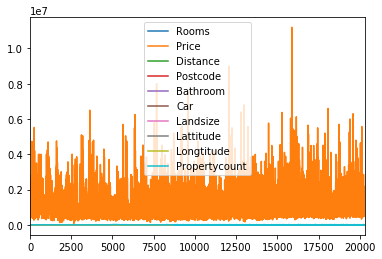

In [10]:
%matplotlib inline
df.plot()

In [11]:
df.loc[1]

Suburb                      Abbotsford
Address                25 Bloomburg St
Rooms                                2
Type                                 h
Price                          1035000
Method                               S
SellerG                         Biggin
Date                        04-02-2016
Distance                           2.5
Postcode                          3067
Bathroom                             1
Car                                  0
Landsize                           156
CouncilArea         Yarra City Council
Lattitude                     -37.8079
Longtitude                     144.993
Regionname       Northern Metropolitan
Propertycount                     4019
Name: 1, dtype: object

In [12]:
g=df.groupby('Regionname')
g

In [13]:
for Regionname,Regionname_df in g :
    print(Regionname)
    print(Regionname_df)

Eastern Metropolitan
           Suburb              Address  Rooms Type    Price Method  \
968      Box Hill       32 Margaret St      4    h  1620000      S   
969      Box Hill       6/29 Barkly St      2    u   645000      S   
970      Box Hill  1/1 Cherryhinton St      2    u   790000      S   
971      Box Hill     4/425 Station St      4    h   880000      S   
972      Box Hill       18 Glenmore St      4    h  1560000     PI   
...           ...                  ...    ...  ...      ...    ...   
20279    Viewbank          43 Eamon Dr      5    h  1050000      S   
20280    Viewbank         78 Graham Rd      3    h   900000     PI   
20282    Wantirna       35 Ainsdale Av      3    h   755000      S   
20283    Wantirna     454 Mountain Hwy      3    h   765000      S   
20284  Warranwood      17 Tanbridge Wy      4    h  1050000     SP   

             SellerG        Date  Distance  Postcode  Bathroom  Car  Landsize  \
968    hockingstuart  03-09-2016      13.1      3128     

In [14]:
g.get_group('Eastern Metropolitan')

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
968,Box Hill,32 Margaret St,4,h,1620000,S,hockingstuart,03-09-2016,13.1,3128,2,2,697.0,Whitehorse City Council,-37.81510,145.13500,Eastern Metropolitan,4605
969,Box Hill,6/29 Barkly St,2,u,645000,S,McGrath,04-03-2017,13.1,3128,1,1,140.0,Whitehorse City Council,-37.82710,145.12990,Eastern Metropolitan,4605
970,Box Hill,1/1 Cherryhinton St,2,u,790000,S,Noel,04-03-2017,13.1,3128,1,1,195.0,Whitehorse City Council,-37.82600,145.12900,Eastern Metropolitan,4605
971,Box Hill,4/425 Station St,4,h,880000,S,Ray,04-03-2017,13.1,3128,2,2,206.0,Whitehorse City Council,-37.82800,145.12150,Eastern Metropolitan,4605
972,Box Hill,18 Glenmore St,4,h,1560000,PI,Jellis,10-09-2016,13.1,3128,2,3,729.0,Whitehorse City Council,-37.82330,145.12670,Eastern Metropolitan,4605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20279,Viewbank,43 Eamon Dr,5,h,1050000,S,Miles,24-02-2018,8.9,3084,3,2,576.0,Banyule City Council,-37.73713,145.08957,Eastern Metropolitan,2698
20280,Viewbank,78 Graham Rd,3,h,900000,PI,Nelson,24-02-2018,8.9,3084,2,1,688.0,Banyule City Council,-37.74008,145.08177,Eastern Metropolitan,2698
20282,Wantirna,35 Ainsdale Av,3,h,755000,S,Le,24-02-2018,14.7,3152,1,2,701.0,Knox City Council,-37.85133,145.23040,Eastern Metropolitan,5424
20283,Wantirna,454 Mountain Hwy,3,h,765000,S,Prof.,24-02-2018,14.7,3152,1,2,734.0,Knox City Council,-37.84513,145.24231,Eastern Metropolitan,5424


Regionname
Eastern Metropolitan          AxesSubplot(0.125,0.125;0.775x0.755)
Eastern Victoria              AxesSubplot(0.125,0.125;0.775x0.755)
Northern Metropolitan         AxesSubplot(0.125,0.125;0.775x0.755)
Northern Victoria             AxesSubplot(0.125,0.125;0.775x0.755)
South-Eastern Metropolitan    AxesSubplot(0.125,0.125;0.775x0.755)
Southern Metropolitan         AxesSubplot(0.125,0.125;0.775x0.755)
Western Metropolitan          AxesSubplot(0.125,0.125;0.775x0.755)
Western Victoria              AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

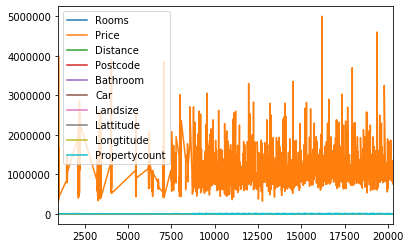

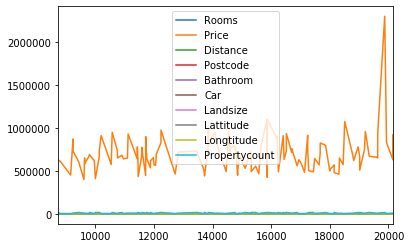

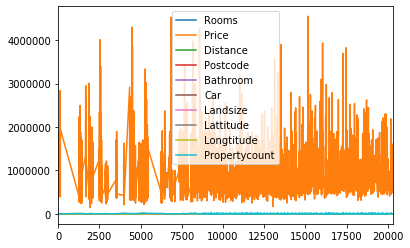

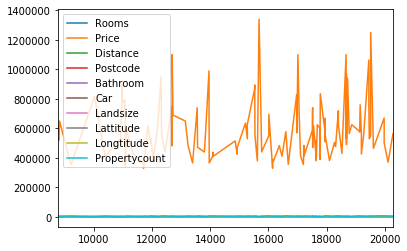

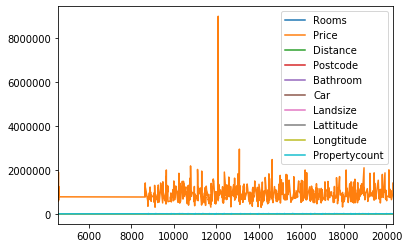

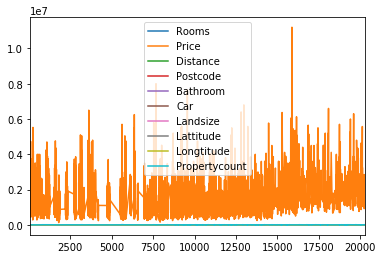

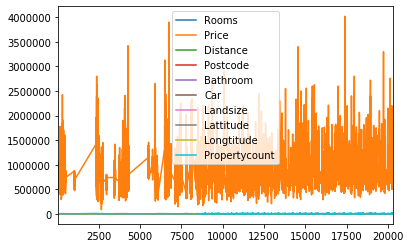

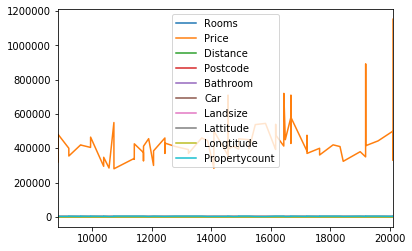

In [15]:
%matplotlib inline
g.plot()

In [16]:
g.describe()

Rooms                                          \
                             count      mean       std  min  25%  50%  75%   
Regionname                                                                   
Eastern Metropolitan        2500.0  3.416000  0.911744  1.0  3.0  3.0  4.0   
Eastern Victoria             128.0  3.523438  0.803191  1.0  3.0  3.0  4.0   
Northern Metropolitan       5779.0  2.892542  0.888396  1.0  2.0  3.0  3.0   
Northern Victoria            126.0  3.460317  0.677062  2.0  3.0  3.0  4.0   
South-Eastern Metropolitan  1007.0  3.362463  0.786757  1.0  3.0  3.0  4.0   
Southern Metropolitan       6194.0  2.977397  1.050850  1.0  2.0  3.0  4.0   
Western Metropolitan        4496.0  3.128114  0.831553  1.0  3.0  3.0  4.0   
Western Victoria              82.0  3.378049  1.118202  2.0  3.0  3.0  4.0   

                                   Price                ...  Longtitude  \
                             max   count          mean  ...         75%   
Regionname                                              ...               
Eastern Metropolitan        16.0  2500.0  1.136270e+06  ...  145.182775   
Eastern Victoria             8.0   128.0  7.027694e+05  ...  145.363627   
Northern Metropolitan       10.0  5779.0  8.956957e+05  ...  145.010500   
Northern Victoria            6.0   126.0  5.872937e+05  ...  145.128193   
South-Eastern Metropolitan   7.0  1007.0  9.071858e+05  ...  145.184315   
Southern Metropolitan       10.0  6194.0  1.469902e+06  ...  145.068930   
Western Metropolitan         8.0  4496.0  8.685667e+05  ...  144.893000   
Western Victoria            12.0    82.0  4.381006e+05  ...  144.578060   

                                      Propertycount                            \
                                  max         count         mean          std   
Regionname                                                                      
Eastern Metropolitan        145.33530        2500.0  6143.773200  3744.689654   
Eastern Victoria            145.51137         128.0  9827.796875  5976.317994   
Northern Metropolitan       145.13100        5779.0  9392.090327  5506.850455   
Northern Victoria           145.52635         126.0  4943.801587  1852.257956   
South-Eastern Metropolitan  145.33248        1007.0  6875.782522  3799.181042   
Southern Metropolitan       145.15126        6194.0  7527.779787  3215.146271   
Western Metropolitan        144.93740        4496.0  6083.922375  3745.782179   
Western Victoria            144.59292          82.0  4215.024390   638.677085   

                                                                       
                               min      25%     50%      75%      max  
Regionname                                                             
Eastern Metropolitan         790.0  3540.00  4973.0   9028.0  15321.0  
Eastern Victoria             810.0  3724.75  8280.0  17093.0  17384.0  
Northern Metropolitan        121.0  5070.00  8870.0  11918.0  21650.0  
Northern Victoria            249.0  3553.00  4258.0   6065.0   7254.0  
South-Eastern Metropolitan   709.0  3692.00  7113.0   8322.0  17055.0  
Southern Metropolitan        394.0  5051.00  7717.0  10331.0  14887.0  
Western Metropolitan         389.0  3656.00  5498.0   6763.0  16166.0  
Western Victoria            2871.0  3600.00  4718.0   4718.0   4718.0  

[8 rows x 80 columns]

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [18]:
df["Regionname"]=le.fit_transform(df["Regionname"])
df["Regionname"]

0        2
1        2
2        2
3        2
4        2
        ..
20307    2
20308    6
20309    6
20310    6
20311    6
Name: Regionname, Length: 20312, dtype: int32

In [19]:
df.Landsize.astype("category").cat.codes

0        192
1        135
2        108
3         63
4         92
        ... 
20307    425
20308    637
20309     68
20310    213
20311    254
Length: 20312, dtype: int16

In [20]:
df=pd.get_dummies(df, columns=['Rooms'])

df

,Suburb,Address,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,...,Rooms_2,Rooms_3,Rooms_4,Rooms_5,Rooms_6,Rooms_7,Rooms_8,Rooms_10,Rooms_12,Rooms_16
0,Abbotsford,85 Turner St,h,1480000,S,Biggin,03-12-2016,2.5,3067,1,...,1,0,0,0,0,0,0,0,0,0
1,Abbotsford,25 Bloomburg St,h,1035000,S,Biggin,04-02-2016,2.5,3067,1,...,1,0,0,0,0,0,0,0,0,0
2,Abbotsford,5 Charles St,h,1465000,SP,Biggin,04-03-2017,2.5,3067,2,...,0,1,0,0,0,0,0,0,0,0
3,Abbotsford,40 Federation La,h,850000,PI,Biggin,04-03-2017,2.5,3067,2,...,0,1,0,0,0,0,0,0,0,0
4,Abbotsford,55a Park St,h,1600000,VB,Nelson,04-06-2016,2.5,3067,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20307,Wollert,35 Kingscote Wy,h,570000,SP,RW,24-02-2018,25.5,3750,2,...,0,1,0,0,0,0,0,0,0,0
20308,Yarraville,13 Burns St,h,1480000,PI,Jas,24-02-2018,6.3,3013,1,...,0,0,1,0,0,0,0,0,0,0
20309,Yarraville,29A Murray St,h,888000,SP,Sweeney,24-02-2018,6.3,3013,2,...,1,0,0,0,0,0,0,0,0,0
20310,Yarraville,147A Severn St,t,705000,S,Jas,24-02-2018,6.3,3013,1,...,1,0,0,0,0,0,0,0,0,0


In [21]:
df.Distance = pd.Categorical(df.Distance)
df.Distance

0         2.5
1         2.5
2         2.5
3         2.5
4         2.5
         ... 
20307    25.5
20308     6.3
20309     6.3
20310     6.3
20311     6.3
Name: Distance, Length: 20312, dtype: category
Categories (206, float64): [0.0, 0.7, 1.2, 1.3, ..., 45.9, 47.3, 47.4, 48.1]

In [22]:
df.stack(level=0)

0      Suburb        Abbotsford
       Address     85 Turner St
       Type                   h
       Price            1480000
       Method                 S
                       ...     
20311  Rooms_7                0
       Rooms_8                0
       Rooms_10               0
       Rooms_12               0
       Rooms_16               0
Length: 568736, dtype: object

In [23]:
pd.crosstab(df.Regionname,[df.Price,df.Landsize],margins=True)

Price      85000 131000 145000       160000 170000        185000         \
Landsize   948.5  499.0   36.0 536.0  322.0   30.0 1250.0  183.0 2347.0   
Regionname                                                                
0              0      0      0     0      0      0      0      0      0   
1              0      0      0     0      0      0      0      0      0   
2              0      0      0     1      0      0      1      0      0   
3              0      0      0     0      0      0      0      0      0   
4              0      0      0     0      0      0      0      0      0   
5              0      1      0     0      1      0      0      0      0   
6              1      0      1     0      0      1      0      1      1   
7              0      0      0     0      0      0      0      0      0   
All            1      1      1     1      1      1      1      1      1   

Price      190000  ... 6370000 6400000 6500000 6600000 6800000 7650000  \
Landsize    248.5  ...   476.0   553.0  1334.0   498.0   336.0  1690.0   
Regionname         ...                                                   
0               0  ...       0       0       0       0       0       0   
1               0  ...       0       0       0       0       0       0   
2               0  ...       0       0       0       0       0       0   
3               0  ...       0       0       0       0       0       0   
4               0  ...       0       0       0       0       0       0   
5               0  ...       1       1       1       1       1       1   
6               1  ...       0       0       0       0       0       0   
7               0  ...       0       0       0       0       0       0   
All             1  ...       1       1       1       1       1       1   

Price      8000000 9000000 11200000    All  
Landsize    2079.0   744.0   1400.0         
Regionname                                  
0                0       0        0   2500  
1                0       0        0    128  
2                0       0        0   5779  
3                0       0        0    126  
4                0       1        0   1007  
5                1       0        1   6194  
6                0       0        0   4496  
7                0       0        0     82  
All              1       1        1  20312  

[9 rows x 19438 columns]

In [24]:
pd.to_datetime(df.Date)
pd.Series([pd.to_datetime(Date)for Date in df.Date])

0       2016-03-12
1       2016-04-02
2       2017-04-03
3       2017-04-03
4       2016-04-06
           ...    
20307   2018-02-24
20308   2018-02-24
20309   2018-02-24
20310   2018-02-24
20311   2018-02-24
Length: 20312, dtype: datetime64[ns]

In [25]:
pd.date_range(start='2017-02-25',end='2018-02-24',freq='W')

DatetimeIndex(['2017-02-26', '2017-03-05', '2017-03-12', '2017-03-19',
               '2017-03-26', '2017-04-02', '2017-04-09', '2017-04-16',
               '2017-04-23', '2017-04-30', '2017-05-07', '2017-05-14',
               '2017-05-21', '2017-05-28', '2017-06-04', '2017-06-11',
               '2017-06-18', '2017-06-25', '2017-07-02', '2017-07-09',
               '2017-07-16', '2017-07-23', '2017-07-30', '2017-08-06',
               '2017-08-13', '2017-08-20', '2017-08-27', '2017-09-03',
               '2017-09-10', '2017-09-17', '2017-09-24', '2017-10-01',
               '2017-10-08', '2017-10-15', '2017-10-22', '2017-10-29',
               '2017-11-05', '2017-11-12', '2017-11-19', '2017-11-26',
               '2017-12-03', '2017-12-10', '2017-12-17', '2017-12-24',
               '2017-12-31', '2018-01-07', '2018-01-14', '2018-01-21',
               '2018-01-28', '2018-02-04', '2018-02-11', '2018-02-18'],
              dtype='datetime64[ns]', freq='W-SUN')

In [51]:
X = df.drop(['Price','Suburb','Address','Type','Method','SellerG','Date','CouncilArea'], axis = 1)
y= np.log1p(df.Price)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)

In [52]:
X

,Distance,Postcode,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname,Propertycount,Rooms_1,Rooms_2,Rooms_3,Rooms_4,Rooms_5,Rooms_6,Rooms_7,Rooms_8,Rooms_10,Rooms_12,Rooms_16
0,2.5,3067,1,1,202.0,-37.79960,144.99840,2,4019,0,1,0,0,0,0,0,0,0,0,0
1,2.5,3067,1,0,156.0,-37.80790,144.99340,2,4019,0,1,0,0,0,0,0,0,0,0,0
2,2.5,3067,2,0,134.0,-37.80930,144.99440,2,4019,0,0,1,0,0,0,0,0,0,0,0
3,2.5,3067,2,1,94.0,-37.79690,144.99690,2,4019,0,0,1,0,0,0,0,0,0,0,0
4,2.5,3067,1,2,120.0,-37.80720,144.99410,2,4019,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20307,25.5,3750,2,2,404.0,-37.61031,145.03393,2,2940,0,0,1,0,0,0,0,0,0,0,0
20308,6.3,3013,1,3,593.0,-37.81053,144.88467,6,6543,0,0,0,1,0,0,0,0,0,0,0
20309,6.3,3013,2,1,98.0,-37.81551,144.88826,6,6543,0,1,0,0,0,0,0,0,0,0,0
20310,6.3,3013,1,2,220.0,-37.82286,144.87856,6,6543,0,1,0,0,0,0,0,0,0,0,0


In [53]:
y

0        14.207553
1        13.849913
2        14.197366
3        13.652993
4        14.285515
           ...    
20307    13.253393
20308    14.207553
20309    13.696728
20310    13.465955
20311    13.835314
Name: Price, Length: 20312, dtype: float64

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.22)

In [56]:
len(X_train)

15843

In [57]:
len(X_test)

4469

In [58]:
len(y_test)

4469

In [59]:
len(y_train)

15843

In [60]:
X_train

,Distance,Postcode,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname,Propertycount,Rooms_1,Rooms_2,Rooms_3,Rooms_4,Rooms_5,Rooms_6,Rooms_7,Rooms_8,Rooms_10,Rooms_12,Rooms_16
1827,8.1,3161,1,1,875.0,-37.86090,145.01260,5,6923,0,1,0,0,0,0,0,0,0,0,0
14918,6.4,3012,1,2,334.0,-37.77784,144.88373,6,3873,0,0,1,0,0,0,0,0,0,0,0
13398,14.5,3087,2,2,596.5,-37.71289,145.07555,2,2329,0,0,0,0,1,0,0,0,0,0,0
6366,4.6,3142,1,1,1099.0,-37.84400,145.00500,5,7217,1,0,0,0,0,0,0,0,0,0,0
15065,10.4,3042,1,2,540.0,-37.72459,144.87406,6,3464,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12602,16.5,3049,2,2,607.0,-37.67379,144.89826,2,1130,0,0,1,0,0,0,0,0,0,0,0
16809,14.7,3152,2,3,630.0,-37.88520,145.23110,0,7082,0,0,1,0,0,0,0,0,0,0,0
5013,8.8,3072,1,2,396.0,-37.73850,145.01030,2,14577,0,0,1,0,0,0,0,0,0,0,0
6205,13.8,3107,1,2,664.0,-37.76370,145.11170,0,5420,0,0,1,0,0,0,0,0,0,0,0


In [61]:
X_test

,Distance,Postcode,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname,Propertycount,Rooms_1,Rooms_2,Rooms_3,Rooms_4,Rooms_5,Rooms_6,Rooms_7,Rooms_8,Rooms_10,Rooms_12,Rooms_16
5387,2.6,3121,2,1,249.0,-37.81470,145.00840,2,14949,0,0,0,1,0,0,0,0,0,0,0
16614,5.1,3011,1,1,274.0,-37.79570,144.88320,6,7570,0,0,0,1,0,0,0,0,0,0,0
19847,9.7,3104,3,1,1011.0,-37.79467,145.08790,5,7809,0,0,0,1,0,0,0,0,0,0,0
791,13.9,3165,2,2,683.0,-37.93330,145.06020,5,10969,0,0,0,0,1,0,0,0,0,0,0
13954,14.8,3023,1,1,562.0,-37.77224,144.77381,6,6388,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,5.9,3032,1,1,173.0,-37.77310,144.92060,6,6567,0,1,0,0,0,0,0,0,0,0,0
15025,10.5,3020,1,2,695.0,-37.78561,144.80739,6,6763,0,0,1,0,0,0,0,0,0,0,0
2238,8.5,3185,2,2,661.0,-37.88440,145.01170,5,4898,0,0,0,1,0,0,0,0,0,0,0
5410,2.6,3121,1,1,176.0,-37.82140,145.01190,2,14949,0,0,1,0,0,0,0,0,0,0,0


In [62]:
y_test

5387     14.313252
16614    13.906266
19847    14.707509
791      14.058458
13954    13.356646
           ...    
299      13.764218
15025    13.458837
2238     14.914123
5410     14.247294
7730     13.810499
Name: Price, Length: 4469, dtype: float64

In [63]:
y_train

1827     13.217675
14918    13.712371
13398    13.910822
6366     12.911645
15065    13.598599
           ...    
12602    13.369225
16809    13.753636
5013     13.618280
6205     13.878486
16055    13.415034
Name: Price, Length: 15843, dtype: float64

In [64]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
y_pred = clf.predict(X_test)

In [66]:
MSE = mean_squared_error(y_pred,y_test)

In [67]:
MSE

0.10533826979412486